In [2]:
from numpy import loadtxt
import numpy as np
import pandas as pd
from keras import models
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [4]:
dataframe=pd.read_csv('pima-indians-diabetes.csv',delimiter=',')
dataframe.head()


6  148  72  35    0  33.6  0.627  50  1
0  1   85  66  29    0  26.6  0.351  31  0
1  8  183  64   0    0  23.3  0.672  32  1
2  1   89  66  23   94  28.1  0.167  21  0
3  0  137  40  35  168  43.1  2.288  33  1
4  5  116  74   0    0  25.6  0.201  30  0

In [5]:
X=dataframe.iloc[:,:8]
y=dataframe.iloc[:,8]
dataframe.shape


(767, 9)

In [6]:
features_train,features_test,target_train,target_test=train_test_split(X,y,
test_size=0.33,random_state=0)

In [8]:
network=models.Sequential()
network.add(Dense(units=8,activation="relu",input_shape=(features_train.shape[1],)))
network.add(Dense(units=8,activation="relu"))


In [9]:
network.add(Dense(units=1,activation="sigmoid"))

In [10]:
network.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [12]:
history=network.fit(features_train,target_train,epochs=20,verbose=1,batch_size=100,validation_data=(features_test,target_test))

Epoch 1/20
6/6 [==============================] - 1s 64ms/step - loss: 37.2239 - accuracy: 0.3684 - val_loss: 37.5388 - val_accuracy: 0.3071
Epoch 2/20
6/6 [==============================] - 0s 15ms/step - loss: 32.7685 - accuracy: 0.3684 - val_loss: 32.9607 - val_accuracy: 0.3071
Epoch 3/20
6/6 [==============================] - 0s 8ms/step - loss: 28.7825 - accuracy: 0.3684 - val_loss: 28.7011 - val_accuracy: 0.3071
Epoch 4/20
6/6 [==============================] - 0s 8ms/step - loss: 24.9557 - accuracy: 0.3684 - val_loss: 24.7949 - val_accuracy: 0.3071
Epoch 5/20
6/6 [==============================] - 0s 8ms/step - loss: 21.5573 - accuracy: 0.3606 - val_loss: 21.3398 - val_accuracy: 0.3150
Epoch 6/20
6/6 [==============================] - 0s 7ms/step - loss: 18.5227 - accuracy: 0.3704 - val_loss: 18.4337 - val_accuracy: 0.3189
Epoch 7/20
6/6 [==============================] - 0s 8ms/step - loss: 16.0852 - accuracy: 0.3743 - val_loss: 15.9317 - val_accuracy: 0.3504
Epoch 8/20
6/6 [==

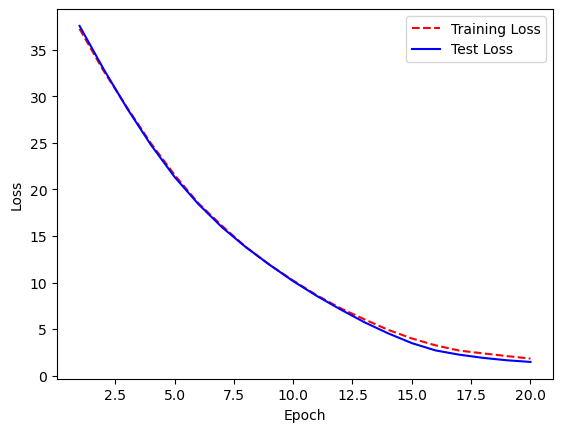

In [13]:
training_loss=history.history["loss"]
test_loss=history.history["val_loss"]
epoch_count=range(1,len(training_loss)+1)
plt.plot(epoch_count,training_loss,"r--")
plt.plot(epoch_count,test_loss,"b-")
plt.legend(["Training Loss","Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


In [14]:
_,accuracy=network.evaluate(features_train,target_train)
print('Accuracy: %.2f'%(accuracy*100))


17/17 [==============================] - 0s 1ms/step - loss: 1.6977 - accuracy: 0.6257
Accuracy: 62.57


In [15]:
predicted_target=network.predict(features_test)
_,accuracy=network.evaluate(features_test,target_test)
print('Accuracy: %.2f'%(accuracy*100))


8/8 [==============================] - 0s 2ms/step - loss: 1.4759 - accuracy: 0.6457
Accuracy: 64.57


In [17]:
for i in range(10):
    print(predicted_target[i])

[0.00493199]
[0.43697307]
[0.24992919]
[0.08157146]
[0.95206845]
[0.00407674]
[0.999872]
[0.19132857]
[0.4816727]
[0.00655362]


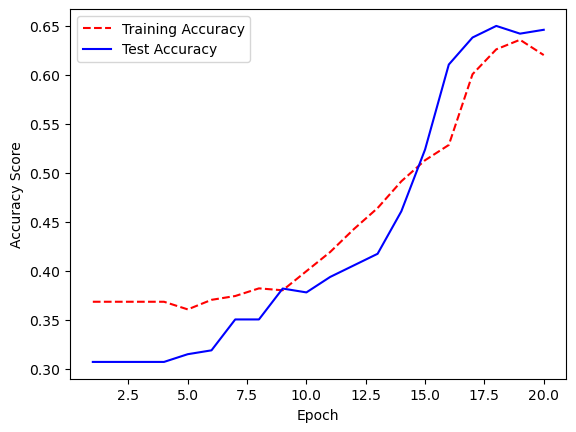

In [18]:
training_accuracy=history.history["accuracy"]
test_accuracy=history.history["val_accuracy"]
plt.plot(epoch_count,training_accuracy,"r--")
plt.plot(epoch_count,test_accuracy,"b-")
plt.legend(["Training Accuracy","Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show()